# Machine Learning in Python - Project 1

Due Friday, March 11th by 5 pm.

*include contributors names here*

## 0. Setup

In [1]:
# Add any additional libraries or submodules below

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules
import sklearn

In [3]:
# Load data
df = pd.read_csv("the_office.csv")

## 1. Introduction

*This section should include a brief introduction to the task and the data (assume this is a report you are delivering to a client). If you use any additional data sources, you should introduce them here and discuss why they were included.*

*Briefly outline the approaches being used and the conclusions that you are able to draw.*

- Do this section later, after coding everything.

## 2. Exploratory Data Analysis and Feature Engineering

*Include a detailed discussion of the data with a particular emphasis on the features of the data that are relevant for the subsequent modeling. Including visualizations of the data is strongly encouraged - all code and plots must also be described in the write up. Think carefully about whether each plot needs to be included in your final draft - your report should include figures but they should be as focused and impactful as possible.*

*Additionally, this section should also implement and describe any preprocessing / feature engineering of the data. Specifically, this should be any code that you use to generate new columns in the data frame `d`. All of this processing is explicitly meant to occur before we split the data in to training and testing subsets. Processing that will be performed as part of an sklearn pipeline can be mentioned here but should be implemented in the following section.*

*All code and figures should be accompanied by text that provides an overview / context to what is being done or presented.*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        186 non-null    int64  
 1   episode       186 non-null    int64  
 2   episode_name  186 non-null    object 
 3   director      186 non-null    object 
 4   writer        186 non-null    object 
 5   imdb_rating   186 non-null    float64
 6   total_votes   186 non-null    int64  
 7   air_date      186 non-null    object 
 8   n_lines       186 non-null    int64  
 9   n_directions  186 non-null    int64  
 10  n_words       186 non-null    int64  
 11  n_speak_char  186 non-null    int64  
 12  main_chars    186 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 19.0+ KB


In [5]:
df.head()

,season,episode,episode_name,director,writer,imdb_rating,total_votes,air_date,n_lines,n_directions,n_words,n_speak_char,main_chars
0,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,7.6,3706,2005-03-24,229,27,2757,15,Angela;Dwight;Jim;Kevin;Michael;Oscar;Pam;Phyl...
1,1,2,Diversity Day,Ken Kwapis,B.J. Novak,8.3,3566,2005-03-29,203,20,2808,12,Angela;Dwight;Jim;Kelly;Kevin;Michael;Oscar;Pa...
2,1,3,Health Care,Ken Whittingham,Paul Lieberstein,7.9,2983,2005-04-05,244,21,2769,13,Angela;Dwight;Jim;Kevin;Meredith;Michael;Oscar...
3,1,4,The Alliance,Bryan Gordon,Michael Schur,8.1,2886,2005-04-12,243,24,2939,14,Angela;Dwight;Jim;Kevin;Meredith;Michael;Oscar...
4,1,5,Basketball,Greg Daniels,Greg Daniels,8.4,3179,2005-04-19,230,49,2437,18,Angela;Darryl;Dwight;Jim;Kevin;Michael;Oscar;P...


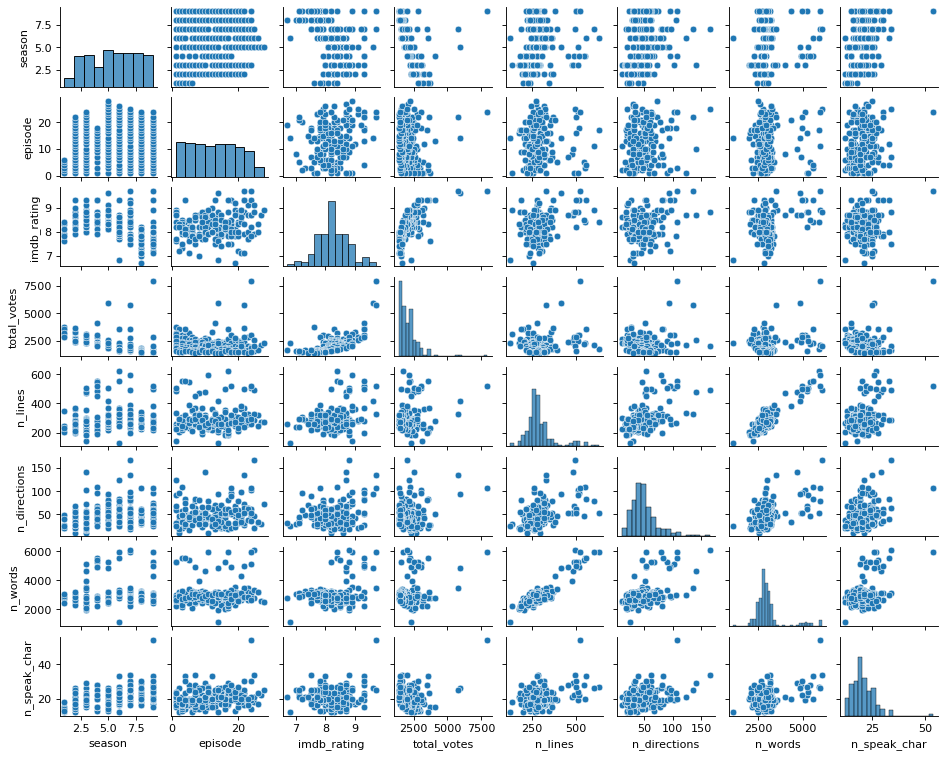

In [19]:
sns.pairplot(df, height=1.2, aspect=1.25)

The only strong correlation I can see is with n_lines and n_words, which makes sense. Other than that, the numeric data is pretty much uncorrelated.

61


C:\Users\ANOUSHKA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


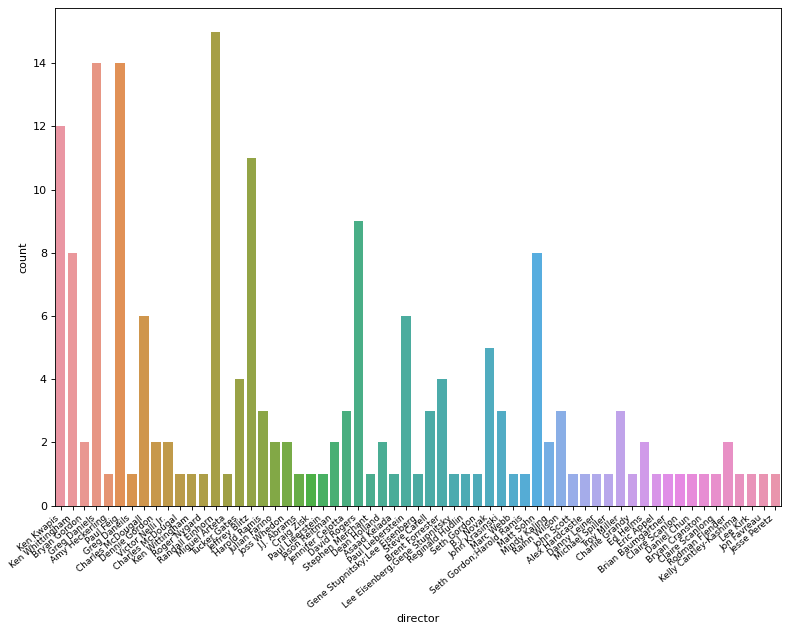

In [22]:
directors = df["director"]
print(directors.nunique())

plt.figure(figsize=(10,8))
ax = sns.countplot(directors)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=8)
plt.tight_layout()
plt.show()


47


C:\Users\ANOUSHKA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


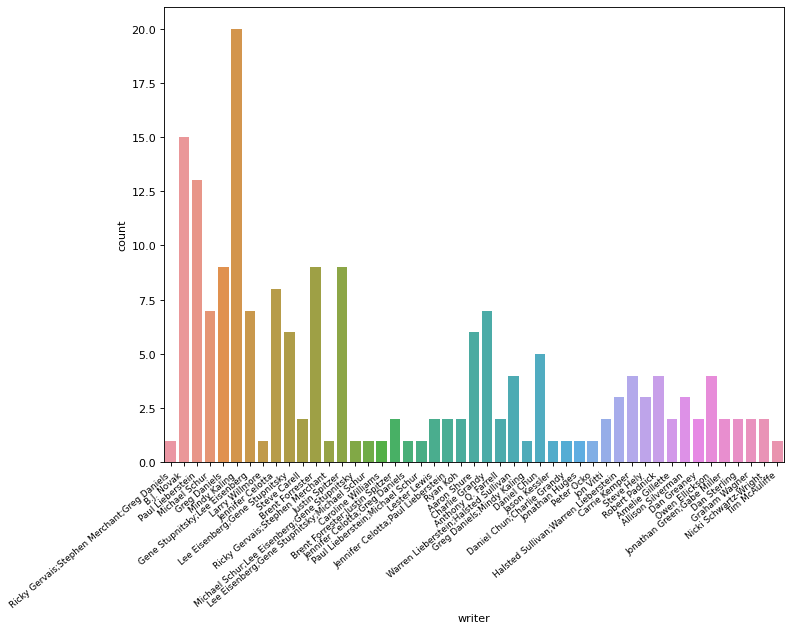

In [23]:
writers = df["writer"]
print(writers.nunique())

plt.figure(figsize=(10,8))
ax = sns.countplot(writers)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=8)
plt.tight_layout()
plt.show()

In [21]:
#checking for missing values (IDA effect)
df.isnull().sum()   #no missing values :)

season          0
episode         0
episode_name    0
director        0
writer          0
imdb_rating     0
total_votes     0
air_date        0
n_lines         0
n_directions    0
n_words         0
n_speak_char    0
main_chars      0
dtype: int64

- Some Exploration of the data

Checking for top-rated episodes

In [26]:
top_rated = df.sort_values(by=["imdb_rating","total_votes"],ascending=False).head(10) #the top 10 rated episodes
top_rated

,season,episode,episode_name,director,writer,imdb_rating,total_votes,air_date,n_lines,n_directions,n_words,n_speak_char,main_chars
185,9,24,Finale,Ken Kwapis,Greg Daniels,9.7,7934,2013-05-16,522,107,5960,54,Andy;Angela;Creed;Darryl;Dwight;Erin;Jim;Kelly...
135,7,22,"Goodbye, Michael",Paul Feig,Greg Daniels,9.7,5749,2011-04-28,329,135,3483,25,Andy;Angela;Creed;Darryl;Dwight;Erin;Jim;Kelly...
77,5,14,Stress Relief (Parts 1&2),Jeffrey Blitz,Paul Lieberstein,9.6,5948,2009-02-01,416,93,4855,26,Andy;Angela;Creed;Darryl;Dwight;Jim;Kelly;Kevi...
59,4,13,Dinner Party,Paul Feig,Gene Stupnitsky;Lee Eisenberg,9.3,4095,2008-04-10,282,51,2805,15,Andy;Angela;Dwight;Jim;Michael;Pam;Phyllis;Sta...
27,2,22,Casino Night,Greg Daniels,Steve Carell,9.3,3644,2006-05-11,368,28,3204,23,Angela;Creed;Darryl;Dwight;Jim;Kelly;Kevin;Mer...
94,6,4,Niagara (Parts 1&2),Paul Feig,Greg Daniels;Mindy Kaling,9.3,3579,2009-10-08,552,83,5580,33,Andy;Angela;Dwight;Erin;Jim;Kelly;Kevin;Meredi...
130,7,17,Threat Level Midnight,Tucker Gates,B.J. Novak,9.3,3525,2011-02-17,194,81,2245,28,Andy;Creed;Dwight;Erin;Jim;Kelly;Kevin;Michael...
50,3,24,The Job (Parts 1&2),Ken Kwapis,Paul Lieberstein;Michael Schur,9.3,3010,2007-05-17,508,102,5151,19,Andy;Angela;Creed;Dwight;Jim;Kelly;Kevin;Mered...
64,4,18,"Goodbye, Toby (Parts 1&2)",Paul Feig,Jennifer Celotta;Paul Lieberstein,9.3,3010,2008-05-15,516,96,4960,22,Andy;Angela;Creed;Darryl;Dwight;Jim;Kelly;Kevi...
184,9,22,A.A.R.M,David Rogers,Brent Forrester,9.3,2860,2013-05-09,501,54,4965,30,Andy;Angela;Creed;Darryl;Dwight;Erin;Jim;Kevin...


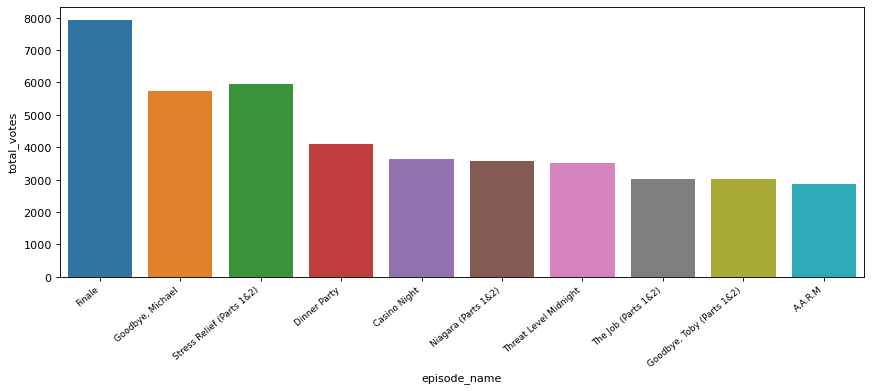

In [36]:
plt.figure(figsize=(11, 5))
ax1 = sns.barplot(x= 'episode_name',y= 'total_votes',data=top_rated)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right",fontsize=8)
plt.tight_layout()
plt.show()

In [30]:
lowest_rated = df.sort_values(by=["imdb_rating","total_votes"]).head(10) #the lowest 10 rated episodes
lowest_rated

,season,episode,episode_name,director,writer,imdb_rating,total_votes,air_date,n_lines,n_directions,n_words,n_speak_char,main_chars
157,8,19,Get The Girl,Rainn Wilson,Charlie Grandy,6.7,1642,2012-03-15,261,32,2811,21,Andy;Angela;Creed;Darryl;Dwight;Erin;Jim;Kelly...
103,6,14,The Banker,Jeffrey Blitz,Jason Kessler,6.8,2288,2010-01-21,131,25,1098,12,Andy;Angela;Dwight;Kevin;Michael;Pam;Ryan;Toby
146,8,8,Gettysburg,Jeffrey Blitz,Robert Padnick,7.0,1584,2011-11-17,238,30,3051,25,Andy;Angela;Darryl;Dwight;Erin;Jim;Kelly;Kevin...
160,8,22,Fundraiser,David Rogers,Owen Ellickson,7.1,1453,2012-04-26,239,31,2859,21,Andy;Angela;Creed;Darryl;Dwight;Erin;Jim;Kevin...
167,9,5,Here Comes Treble,Claire Scanlong,Owen Ellickson,7.1,1515,2012-10-25,292,45,2878,25,Andy;Angela;Creed;Darryl;Dwight;Erin;Jim;Kevin...
159,8,21,Angry Andy,Claire Scanlon,Justin Spitzer,7.1,1585,2012-04-19,292,37,3141,22,Andy;Angela;Creed;Darryl;Dwight;Erin;Jim;Kelly...
164,9,2,Roy's Wedding,Matt Sohn,Allison Silverman,7.2,1477,2012-09-27,296,95,2908,20,Andy;Angela;Creed;Darryl;Dwight;Erin;Jim;Kevin...
158,8,20,Welcome Party,Ed Helms,Steve Hely,7.2,1489,2012-04-12,307,60,3087,26,Andy;Angela;Creed;Darryl;Dwight;Erin;Jim;Kevin...
141,8,3,Lotto,John Krasinski,Charlie Grandy,7.3,1601,2011-10-06,288,48,3243,21,Andy;Angela;Creed;Darryl;Dwight;Erin;Jim;Kelly...
177,9,15,Couples Discount,Troy Miller,Allison Silverman,7.4,1407,2013-02-07,260,70,3076,21,Andy;Angela;Darryl;Dwight;Erin;Jim;Kevin;Mered...


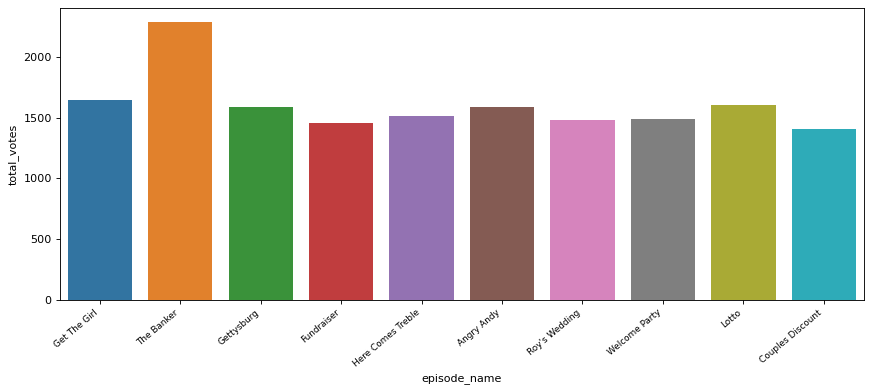

In [37]:
plt.figure(figsize=(11, 5))
ax1 = sns.barplot(x= 'episode_name',y= 'total_votes',data=lowest_rated)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right",fontsize=8)
plt.tight_layout()
plt.show()

- Checking writers related with the highest rating;by taking the average of the ratings

In [39]:
writers_avg_rating = df.groupby("writer")['imdb_rating'].mean().reset_index()

best_writers= writers_avg_rating.sort_values("imdb_rating",ascending= False).head(10)
best_writers


,writer,imdb_rating
37,Paul Lieberstein;Michael Schur,9.300000
17,Greg Daniels;Mindy Kaling,9.300000
22,Jennifer Celotta;Paul Lieberstein,9.100000
21,Jennifer Celotta;Greg Daniels,9.100000
43,Steve Carell,8.800000
29,Lee Eisenberg;Gene Stupnitsky;Michael Schur,8.800000
16,Greg Daniels,8.744444
30,Lester Lewis,8.600000
32,Michael Schur;Lee Eisenberg;Gene Stupnitsky,8.600000
23,Jon Vitti,8.550000


- Checking for the highest rated seasons

In [42]:
season_avg_rating = df.groupby("season")["imdb_rating"].mean().reset_index()
season_avg_rating.head(9)
#top_seasons = season_avg_rating.sort_values("imdb_rating",ascending= False).head(9)
#top_seasons

,season,imdb_rating
0,1,8.016667
1,2,8.436364
2,3,8.573913
3,4,8.600000
4,5,8.492308
5,6,8.162500
6,7,8.316667
7,8,7.666667
8,9,7.956522


<AxesSubplot:xlabel='season', ylabel='imdb_rating'>

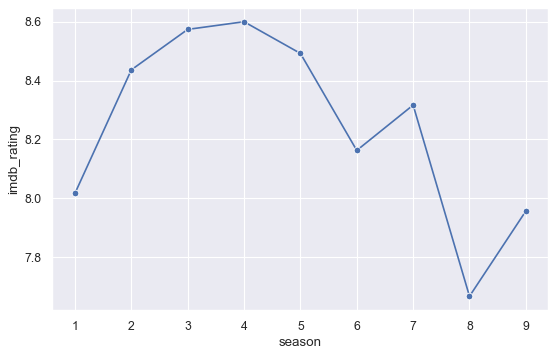

In [46]:
sns.set_theme(style="darkgrid")
sns.lineplot(data=season_avg_rating,x="season",y="imdb_rating",marker="o")

In [ ]:
#for handling categorical data, decided to go with decision based algorithms
#our caterogical data consists of episode_name, director, writer,air_date and main_chars
#now, working with date, we can use pandas datetime, to manipulate it and see what we might want to work with(years/month);i am thinking years


## 3. Model Fitting and Tuning

*In this section you should detail your choice of model and describe the process used to refine and fit that model. You are strongly encouraged to explore many different modeling methods (e.g. linear regression, regression trees, lasso, etc.) but you should not include a detailed narrative of all of these attempts. At most this section should mention the methods explored and why they were rejected - most of your effort should go into describing the model you are using and your process for tuning and validatin it.*

*For example if you considered a linear regression model, a classification tree, and a lasso model and ultimately settled on the linear regression approach then you should mention that other two approaches were tried but do not include any of the code or any in depth discussion of these models beyond why they were rejected. This section should then detail is the development of the linear regression model in terms of features used, interactions considered, and any additional tuning and validation which ultimately led to your final model.* 

*This section should also include the full implementation of your final model, including all necessary validation. As with figures, any included code must also be addressed in the text of the document.*

## 4. Discussion & Conclusions


*In this section you should provide a general overview of your final model, its performance, and reliability. You should discuss what the implications of your model are in terms of the included features, predictive performance, and anything else you think is relevant.*

*This should be written with a target audience of a NBC Universal executive who is with the show and  university level mathematics but not necessarily someone who has taken a postgraduate statistical modeling course. Your goal should be to convince this audience that your model is both accurate and useful.*

*Finally, you should include concrete recommendations on what NBC Universal should do to make their reunion episode a popular as possible.*

*Keep in mind that a negative result, i.e. a model that does not work well predictively, that is well explained and justified in terms of why it failed will likely receive higher marks than a model with strong predictive performance but with poor or incorrect explinations / justifications.*